In [96]:
import datetime

In [97]:
import nltk
import string

In [98]:
import pandas as pd
import numpy as np

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [101]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [102]:
from collections import Counter

In [103]:
from imblearn.under_sampling import RandomUnderSampler

In [104]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [105]:
# function to vectorize the type_of_material series into a y target vector.

def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [106]:
#rate of correct predictions out of total predictions

def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')

In [107]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    my_lil_punc_string = '!"#$$%&\()*+,-./:;<=>@[\\]^_`{|}~'

    extras = '[\\,.“-”’!—:()?@]$;"–/#|&‘°\\…%<‐+¡«»_•*>›=€·■♦£💃🏽∙≠{}¿😂¥̇̃★§🇺🇸©！💣。^‑🔥😡″̀🚨⃣😤🌫`●🤭✓📖📹✋👀¢💔😞‒📲📺🎙￼😎↓❤️😘🎉🥂🦔🥩🐐🍑🤸🕳🌵⛽⚕🔊™†‾′̈״÷💜💛¨´💥☄́~‚⌚↑🏁🇰🇪🌎→🗣─‼◇😾🤷🏻♂✔💪®♪😱👍،¯⌘🌈🤩✨̊🤣−😉♥👏💩🤐💋🧓👮👴♀🥴🐎⚡🤔🙁×💯🚂🙏🏾่াং়ে্িু🍆💦🎥💌◾📱👋🏼؟🙂🚫❗🙄🛑🌧❄̶🤝；🤯🧵😹¶➡😏🔧✌➼◉🐱⚪̧̄➔😺😁🇬🇧👎🍺'
    punc_list = my_lil_punc_string + extras
    
    for char in string:
        if char in punc_list:  
            string = string.replace(char, "")
            
    return string

In [108]:
%%time
#import csv

_2019_data = pd.read_csv('data/capstone2_2019_final.csv', index_col='Unnamed: 0')

CPU times: user 1.16 s, sys: 214 ms, total: 1.37 s
Wall time: 1.54 s


In [109]:
%%time
_2019_df = _2019_data.copy()

CPU times: user 514 µs, sys: 10 µs, total: 524 µs
Wall time: 521 µs


In [110]:
_2019_df.shape

(30256, 2)

In [111]:
(_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [112]:
text_nan = _2019_df.text.isna()

In [113]:
text_nan

0        False
1        False
2        False
3        False
4        False
         ...  
30251     True
30252    False
30253    False
30254    False
30255    False
Name: text, Length: 30256, dtype: bool

In [114]:
len(text_nan)

30256

In [115]:
(_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [116]:
_2019_df.shape

(30256, 2)

In [117]:
drop_nan_2019_df = _2019_df[text_nan == False]

In [118]:
drop_nan_2019_df.shape

(28484, 2)

In [119]:
# sum(drop_nan_2019_df.type_of_material == "News")

# 1741

In [120]:
# sum(drop_nan_2019_df.type_of_material == "Op-Ed")

# 31

In [121]:
(drop_nan_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [122]:
sum(drop_nan_2019_df.type_of_material == "News")

26472

In [123]:
sum(drop_nan_2019_df.type_of_material == "Op-Ed")

2012

In [124]:
_2019_df = drop_nan_2019_df

In [125]:
_2019_df.shape

(28484, 2)

In [126]:
#define X. X is currently pandas series of unsplit strings

X = _2019_df.text

In [127]:
#turn series into list...

corpus = list(X)

In [134]:
# define y as a series of op-ed or news

y = _2019_df.type_of_material

In [135]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_y_ser(y)

CPU times: user 9.06 ms, sys: 1.11 ms, total: 10.2 ms
Wall time: 9.26 ms


In [35]:
y.value_counts()

0    26472
1     2012
Name: type_of_material, dtype: int64

In [136]:
y.shape

(28484,)

In [1]:
bad_list = ['\",.]]''''''""]}]]]]

SyntaxError: EOL while scanning string literal (<ipython-input-1-6918481bb49d>, line 1)

In [36]:
for _ in (corpus[0]):
    

'\', \'In 2019, here’s what we could do instead.\', "In most Western states, that $1,380 you spent on your phone could buy half an acre of land. In the right conditions, that half acre could easily accommodate 150 trees. A single tree sequesters 48 pounds of carbon a year. It takes about 30 minutes for an amateur forester to plant a tree. If every American smartphone owner used that time and money to plant half an acre of trees, we would sequester about 886 million tons of carbon a year, enough to offset more than 10 percent of the country’s annual emissions. If you don\'t want to do the planting yourself, the National Forest Foundation says it could meet all of its planting goals if every smartphone user gave it just 60 cents.", \'A recent study of romantic relationships among college students in the journal Psychology of Popular Media Culture found that “smartphone dependency is significantly linked to relationship uncertainty” and that “partners’ perceived smartphone dependency pred

In [37]:
_2019_df.head()

,text,type_of_material
0,"', 'In 2019, here’s what we could do instead.'...",Op-Ed
1,"', 'Many years before, back in Russia, the two...",Op-Ed
2,"', 'At a critical moment in the film, just aft...",Op-Ed
3,"', 'No other country in the world symbolizes t...",Op-Ed
4,"', 'The cycle has to be reversed. In the Unite...",Op-Ed


# remove stop words

# stemming/lemmatization

In [38]:
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

In [39]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [40]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [41]:
test_token = snowball_tokenize(corpus[0])

# vectorizer

# SNOWBALL tfidf

In [42]:
%%time
#create vectorizer

snow_vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents='ascii', 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=snowball_tokenize, 
#                 analyzer='word', 
                 stop_words='english', 
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 1), 
                 max_df=0.90, 
                 min_df=0.10, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 75 µs, sys: 4 µs, total: 79 µs
Wall time: 90.1 µs


In [43]:
%%time
print(datetime.datetime.now())

X_snowball = snow_vectorizer.fit_transform(corpus)
# UserWarning: Your stop_words may be inconsistent with your preprocessing. 

2020-12-05 12:59:43.790231


/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 8min 9s, sys: 1.46 s, total: 8min 11s
Wall time: 8min 12s


/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))

<!-- /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent)) -->

# WORDNET tfidf

In [44]:
%%time
#create vectorizer

wordnet_vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents='ascii', 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=wordnet_tokenize, 
#                 analyzer='word', 
                 stop_words='english', 
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 1), 
                 max_df=0.90, 
                 min_df=0.10, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 33 µs, sys: 1 µs, total: 34 µs
Wall time: 35 µs


In [45]:
%%time
print(datetime.datetime.now())

X_worknet = wordnet_vectorizer.fit_transform(corpus)
# UserWarning: Your stop_words may be inconsistent with your preprocessing. 

2020-12-05 13:07:56.320273


/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 5min 5s, sys: 1.73 s, total: 5min 7s
Wall time: 5min 9s


/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))

# count vectorizer

In [46]:
count_vectorizer = CountVectorizer(strip_accents='None',
                                   lowercase=True,
                                   tokenizer=snowball_tokenize,
                                   stop_words='english',
                                   max_features=None)

# test, train, split

In [251]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X_worknet, y, random_state=50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21363, 641) (7121, 641) (21363,) (7121,)
CPU times: user 14.8 ms, sys: 6.66 ms, total: 21.4 ms
Wall time: 20.1 ms


# balance classes

In [252]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 1521), (1, 1521)]
RandomUnderSampler(random_state=0)
CPU times: user 10.9 ms, sys: 1.65 ms, total: 12.6 ms
Wall time: 11.3 ms


# random forest classifier

In [279]:
%%time
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_resampled, y_resampled)
y_pred = rf_clf.predict(X_worknet)
y_pred_test = rf_clf.predict(X_test)

CPU times: user 1.06 s, sys: 11.1 ms, total: 1.07 s
Wall time: 1.07 s


In [280]:
print(y.value_counts())
print(y_resampled.value_counts())
print(y_resampled.shape)
print(y_pred.shape)

0    26472
1     2012
Name: type_of_material, dtype: int64
1    2012
0    2012
Name: type_of_material, dtype: int64
(4024,)
(28484,)


In [281]:
y_pred.shape

(28484,)

### metrics y_pred(X_worknet)

In [282]:
tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = y_pred).ravel()

In [283]:
print(y_test.shape)
print(y_pred.shape)

(7121,)
(28484,)


In [284]:
tn, fp, fn, tp 

(22003, 4469, 66, 1946)

In [285]:
metrics_(tn, fp, fn, tp)

accuracy = 0.8407878107007443
recall = 0.967196819085487
precision = 0.3033515198752923


### metrics y_pred(X_test)

In [289]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred_test).ravel()

In [290]:
print(y_test.shape)
print(y_pred.shape)

(7121,)
(28484,)


In [291]:
tn, fp, fn, tp 

(5500, 1130, 15, 476)

In [292]:
metrics_(tn, fp, fn, tp)

accuracy = 0.8392079764078079
recall = 0.9694501018329938
precision = 0.29638854296388545


# important features

In [301]:
feat_names = wordnet_vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_

In [305]:
len(feat_names)

641

### permutation importance

In [298]:
%%time
print(datetime.datetime.now())
r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feat_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

2020-12-05 14:59:34.149281
'advertisement0.005 +/- 0.001
trump   0.004 +/- 0.001
]       0.003 +/- 0.001
letter  0.002 +/- 0.001
facebook0.002 +/- 0.001
season  0.001 +/- 0.000
policy  0.001 +/- 0.000
care    0.001 +/- 0.000
people  0.001 +/- 0.000
record  0.000 +/- 0.000
mile    0.000 +/- 0.000
CPU times: user 13min 53s, sys: 24.3 s, total: 14min 17s
Wall time: 14min 18s


### plot

2020-12-05 15:14:24.850729
CPU times: user 56.9 ms, sys: 6.82 ms, total: 63.7 ms
Wall time: 81.1 ms


Text(0.5, 0, 'Average contribution to the reduction in variance')

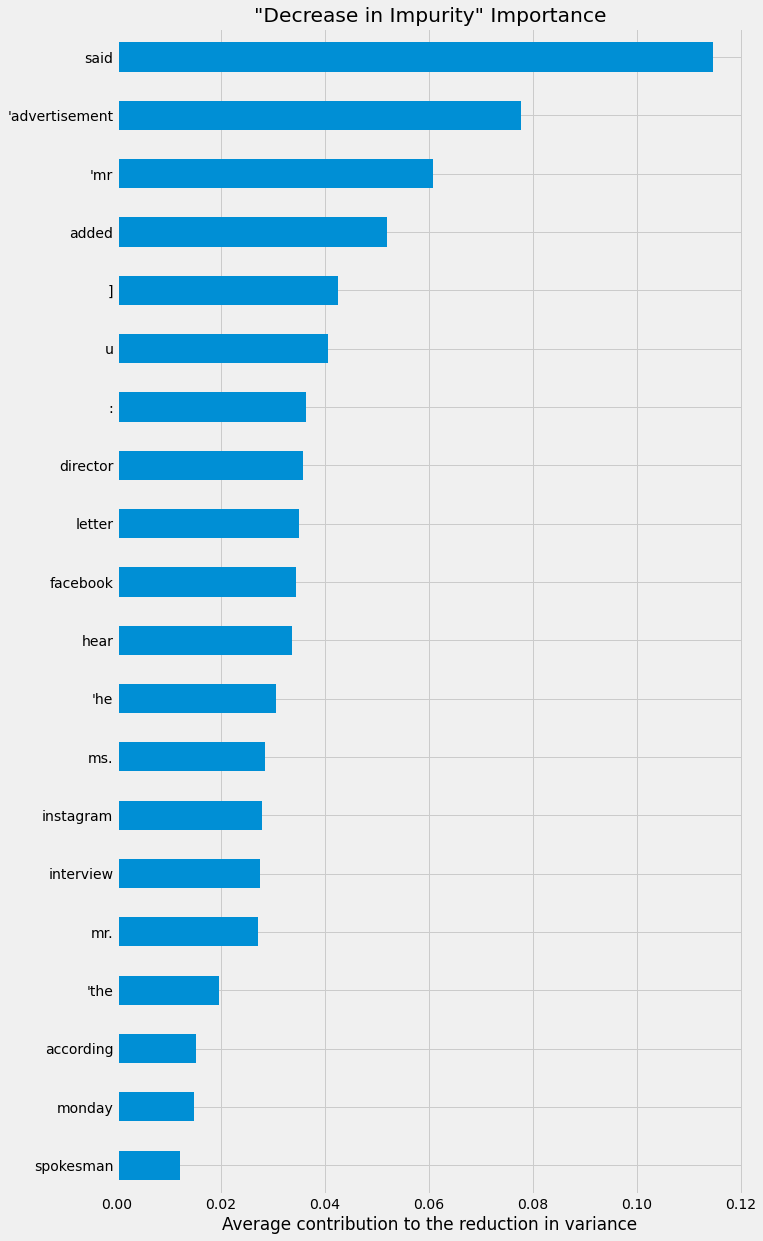

In [302]:
%%time
print(datetime.datetime.now())
feat_scores = pd.Series(feature_import,
                           index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-20:].plot(kind='barh', figsize=(10,20))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance');